## This data explores climate change and food scarcity of specific countries as well as global data.

In [3]:
#imports 

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import math

### Plot yields need to be vs. where they are 

https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3686737/
    
A ∼2.4% per year rate of yield gains (non-compounding) is needed to double crop production by 2050. Current rates are thus not achieving this goal. At current rates only ∼67%, ∼42%, ∼38%, and ∼55% increases in maize, rice, wheat and soybean production, respectively, is possible by 2050.

In [9]:
df = pd.read_csv('data/Merged/engineered_data.csv')

df.head()

,Unnamed: 0,Unnamed: 0.1,Country,Year,Depth of the food deficit (kilocalories per person per day),Population,Temperature - (Celsius),Temperature,cereals,potatoes,...,soybeans,palm-oil,cassava,rapeseed,total_yield,Country_cat,yield_change,yield_percent_change,goal_percent_change,population_percent_change
0,0,0,Haiti,1992,519.0,7319493.0,25.148342,80.296683,9761.0,145455.0,...,0.0,0.0,40326.0,0.0,562480.0,0.0,NaN,NaN,0.024,NaN
1,1,1,Haiti,1993,525.0,7460689.0,25.032542,80.065083,9492.0,150000.0,...,0.0,0.0,40244.0,0.0,606680.0,0.0,44200.0,0.078581,0.024,0.019290
2,2,2,Haiti,1994,543.0,7602320.0,25.361467,80.722933,9239.0,146502.0,...,0.0,0.0,37500.0,0.0,606388.0,0.0,-292.0,-0.000481,0.024,0.018984
3,3,3,Haiti,1995,561.0,7744503.0,25.208525,80.417050,9258.0,143591.0,...,0.0,0.0,39546.0,0.0,599372.0,0.0,-7016.0,-0.011570,0.024,0.018703
4,4,4,Haiti,1996,575.0,7887304.0,24.814733,79.629467,9740.0,140000.0,...,0.0,0.0,40000.0,0.0,596640.0,0.0,-2732.0,-0.004558,0.024,0.018439


In [3]:
df['Year'] = df['Year'].astype('category')

# Modeling Variables through time

In [4]:
def plot_series(df, cols=None, title='Title', xlab=None, ylab=None, steps=1):
    
    # Set figure size to be (18, 9).
    plt.figure(figsize=(18,9))
    
    # Iterate through each column name.
    for col in cols:
            
        # Generate a line plot of the column name.
        # You only have to specify Y, since our
        # index will be a datetime index.
        plt.plot(df[col])
        
    # Generate title and labels.
    plt.title(title, fontsize=26)
    plt.xlabel(xlab, fontsize=20)
    plt.ylabel(ylab, fontsize=20)
    
    # Enlarge tick marks.
    plt.yticks(fontsize=18)
    plt.xticks(df.index[0::steps], fontsize=18);

In [5]:
#Grouping by year and using Means 
pred_df = df.copy()

#creating months for modeling
pred_df["Year"] = pred_df["Year"].astype("string")
pred_df['Year-month'] = "01-01-" + pred_df['Year']

pred_df['Year-month'] = pd.to_datetime(pred_df['Year-month'])

pred_df["Year"] = pred_df["Year"].astype("int")

#pred_df.fillna(0 , inplace = True)

pred_df['Year'] = pd.to_datetime(pred_df['Year'])

year_pred = pred_df.groupby('Year-month').mean()

pred_df.set_index('Year-month', inplace=True)

year_pred.head()

,Unnamed: 0,Unnamed: 0.1,Depth of the food deficit (kilocalories per person per day),Population,Temperature - (Celsius),Temperature,cereals,potatoes,beans,sugar,soybeans,palm-oil,cassava,rapeseed,total_yield,Country_cat,yield_change,yield_percent_change,goal_percent_change,population_percent_change
Year-month,,,,,,,,,,,,,,,,,,,,
1992-01-01,70.0,70.0,207.2,37501673.0,25.358847,80.717693,19447.8,128623.2,6174.2,309362.6,2789.8,32904.8,46724.0,0.0,546026.4,2.8,33304.75,-0.003859,0.024,3.082781
1993-01-01,71.0,71.0,204.2,38512512.2,25.675958,81.351917,19177.6,113730.0,6235.6,275396.8,3007.8,31333.4,46683.8,0.0,495565.0,2.8,-50461.40,-0.110360,0.024,0.035981
1994-01-01,72.0,72.0,203.2,39533775.4,25.772978,81.545957,23646.6,140555.4,5970.8,271743.2,3101.2,32987.0,46447.2,0.0,524451.4,2.8,28886.40,0.329458,0.024,0.034504
1995-01-01,73.0,73.0,203.8,40561066.2,25.731938,81.463877,23977.4,139327.4,6118.6,258840.6,3533.6,32309.8,46128.4,0.0,510235.8,2.8,-14215.60,-0.028662,0.024,0.032620
1996-01-01,74.0,74.0,204.6,41593249.4,25.676680,81.353360,23882.2,132015.6,6045.0,255410.2,3633.6,31825.6,46065.2,0.0,498877.4,2.8,-11358.40,-0.014088,0.024,0.031092


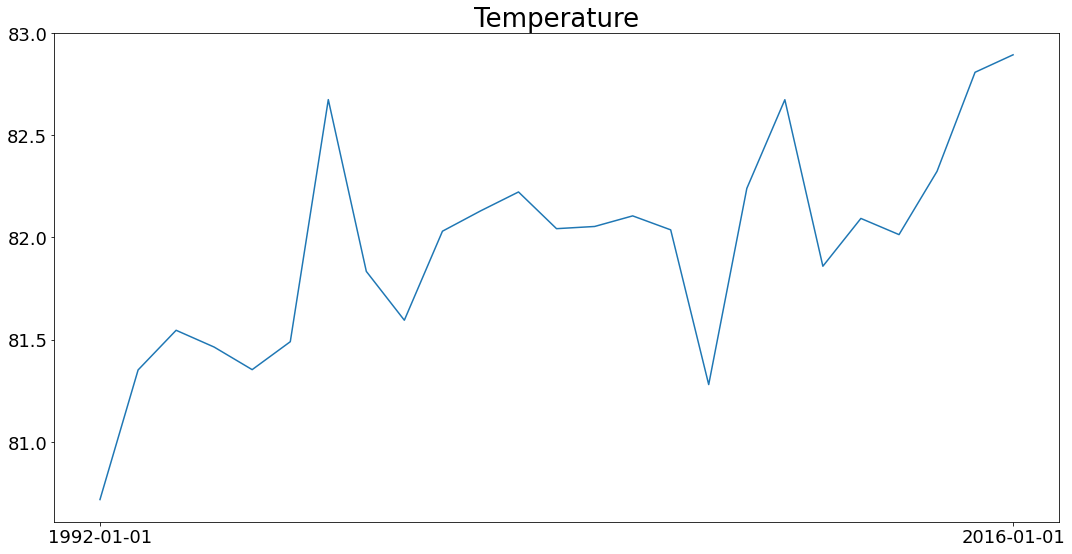

In [6]:
plot_series(year_pred, ['Temperature'], title = 'Temperature', steps = 24)

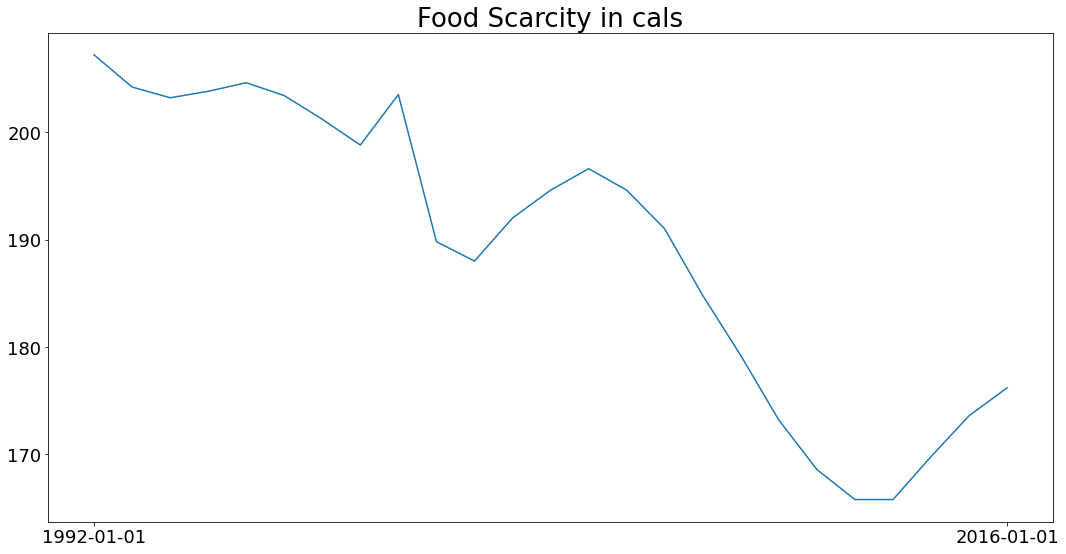

In [7]:
plot_series(year_pred, ['Depth of the food deficit (kilocalories per person per day)'], title = 'Food Scarcity in cals', steps = 24)

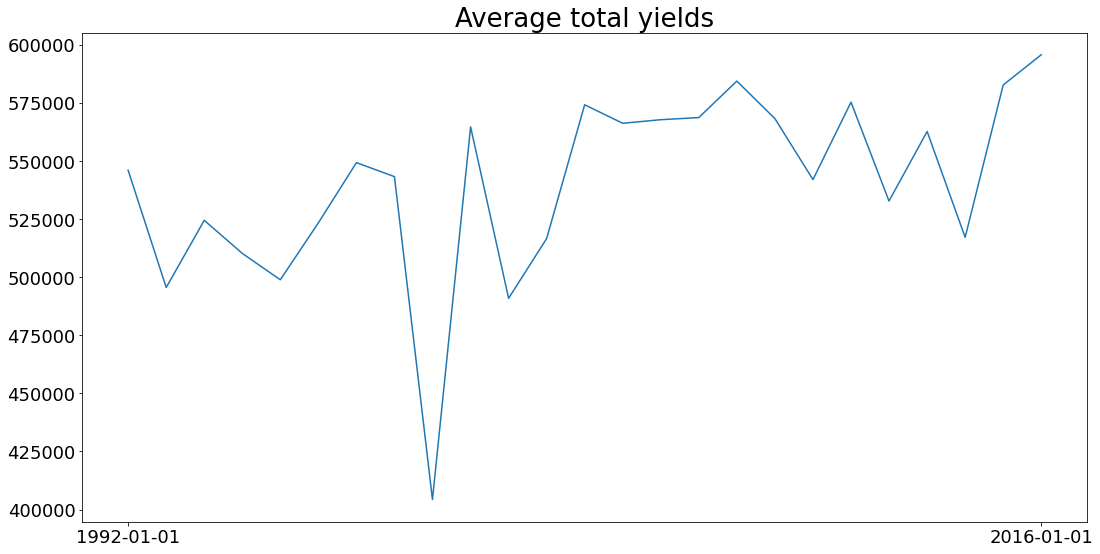

In [8]:
plot_series(year_pred, ['total_yield'], title = 'Average total yields', steps = 24)

## Looking at countries that TIMES defined as greatly impact by climate change 

<AxesSubplot:xlabel='Year'>

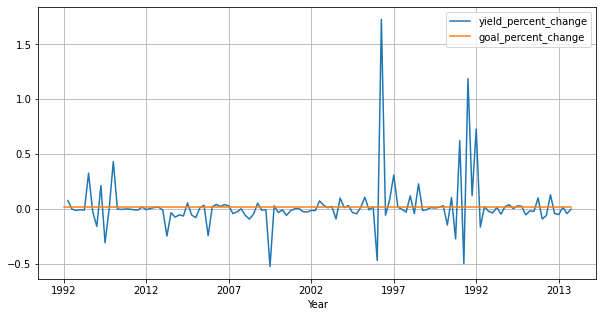

In [9]:
df.plot(x='Year', y=['yield_percent_change', 'goal_percent_change'], figsize=(10,5), grid=True)


In [10]:
#how manypeople food scarce is that? ^^

<AxesSubplot:xlabel='Year'>

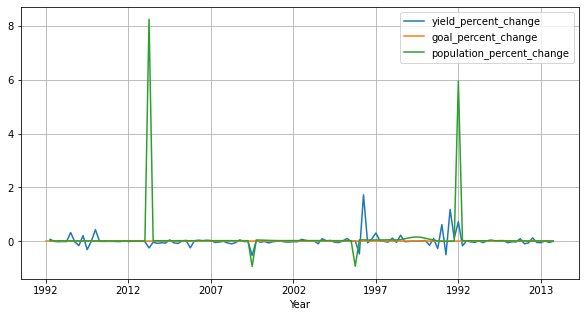

In [11]:
df.plot(x='Year', y=['yield_percent_change', 'goal_percent_change', 'population_percent_change'], figsize=(10,5), grid=True)


<AxesSubplot:xlabel='Year'>

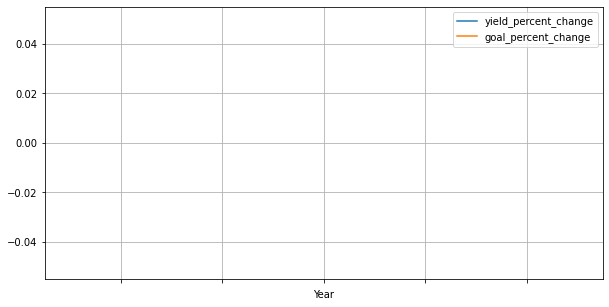

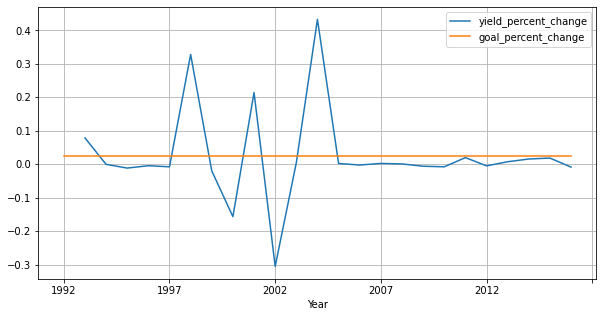

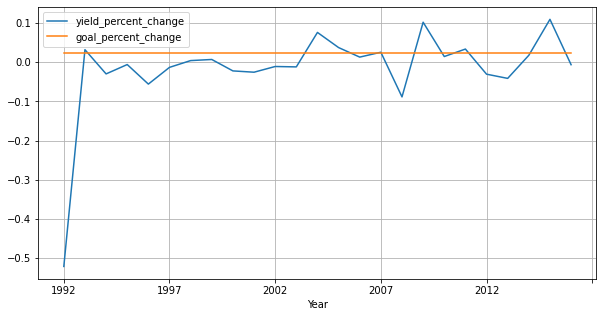

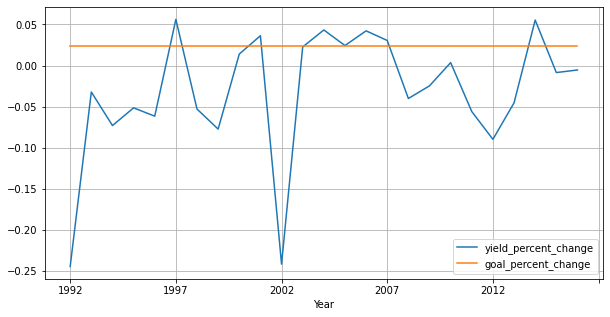

In [12]:
df[df['Country'] == 'Loas'].plot(x='Year', y=['yield_percent_change', 'goal_percent_change'], figsize=(10,5), grid=True)
df[df['Country'] == 'Haiti'].plot(x='Year', y=['yield_percent_change', 'goal_percent_change'], figsize=(10,5), grid=True)
df[df['Country'] == 'Yemen'].plot(x='Year', y=['yield_percent_change', 'goal_percent_change'], figsize=(10,5), grid=True)
df[df['Country'] == 'Nigeria'].plot(x='Year', y=['yield_percent_change', 'goal_percent_change'], figsize=(10,5), grid=True)


In [14]:
log_df = df.copy()
log_df['log_pop'] = np.log2(log_df['Population'])
log_df['log_yield'] = np.log2(log_df['total_yield'])

log_df.head()

,Unnamed: 0,Unnamed: 0.1,Country,Year,Depth of the food deficit (kilocalories per person per day),Population,Temperature - (Celsius),Temperature,cereals,potatoes,...,cassava,rapeseed,total_yield,Country_cat,yield_change,yield_percent_change,goal_percent_change,population_percent_change,log_pop,log_yield
0,0,0,Haiti,1992,519.0,7319493.0,25.148342,80.296683,9761.0,145455.0,...,40326.0,0.0,562480.0,0.0,NaN,NaN,0.024,NaN,22.803312,19.101442
1,1,1,Haiti,1993,525.0,7460689.0,25.032542,80.065083,9492.0,150000.0,...,40244.0,0.0,606680.0,0.0,44200.0,0.078581,0.024,0.019290,22.830877,19.210576
2,2,2,Haiti,1994,543.0,7602320.0,25.361467,80.722933,9239.0,146502.0,...,37500.0,0.0,606388.0,0.0,-292.0,-0.000481,0.024,0.018984,22.858008,19.209882
3,3,3,Haiti,1995,561.0,7744503.0,25.208525,80.417050,9258.0,143591.0,...,39546.0,0.0,599372.0,0.0,-7016.0,-0.011570,0.024,0.018703,22.884741,19.193092
4,4,4,Haiti,1996,575.0,7887304.0,24.814733,79.629467,9740.0,140000.0,...,40000.0,0.0,596640.0,0.0,-2732.0,-0.004558,0.024,0.018439,22.911101,19.186501


In [15]:
log_df['log_temp'] = np.log2(log_df['Temperature'])


<AxesSubplot:xlabel='Year'>

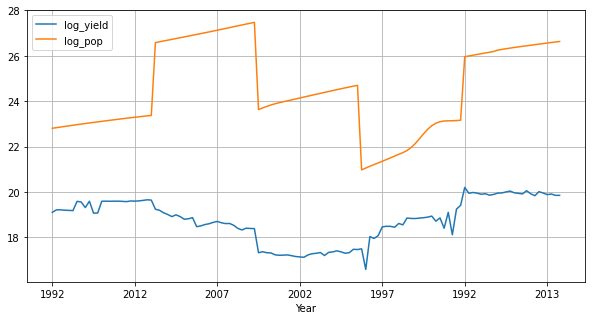

In [16]:
log_df.plot(x='Year', y= (['log_yield', 'log_pop']), figsize=(10,5), grid=True)


<AxesSubplot:xlabel='Year'>

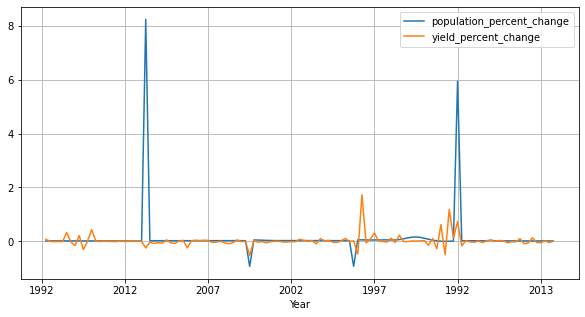

In [17]:
df.plot(x='Year', y= (['population_percent_change', 'yield_percent_change']), figsize=(10,5), grid=True)

In [18]:
df['temperature_percent_change'] = df['Temperature'].pct_change()

<AxesSubplot:xlabel='Year'>

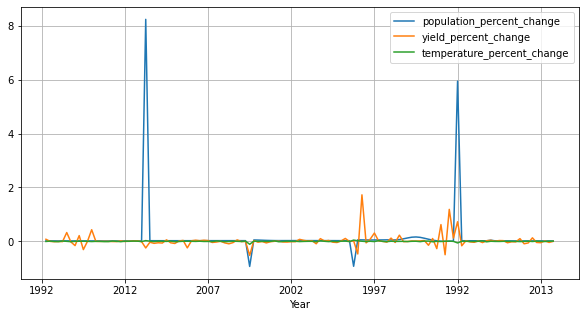

In [19]:
df.plot(x='Year', y= (['population_percent_change', 'yield_percent_change', 'temperature_percent_change']), figsize=(10,5), grid=True)

<AxesSubplot:>

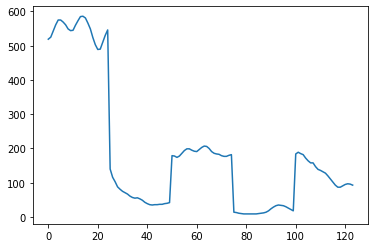

In [21]:
#Looking at food deficits

df['Depth of the food deficit (kilocalories per person per day)'].plot()

<AxesSubplot:xlabel='Year', ylabel='Depth of the food deficit (kilocalories per person per day)'>

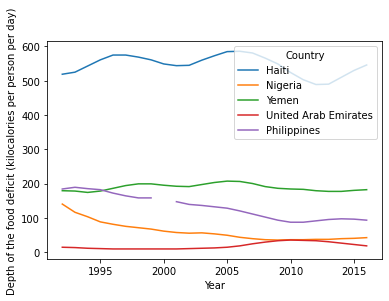

In [22]:
#food deficits by Country

sns.lineplot(data=df, x="Year", y='Depth of the food deficit (kilocalories per person per day)', hue="Country")

 Haiti suffers from greatest hunger, United Arab Emirates duffers the least. Hunger has decreased in both Nigeria and Phillipines throughout the years but appears to be starting to go up in 2015.

<AxesSubplot:xlabel='Year', ylabel='total_yield'>

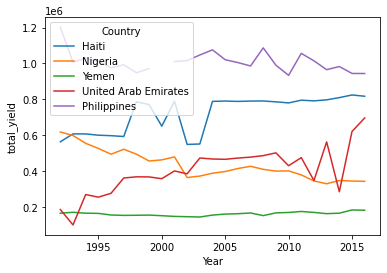

In [23]:
#yields by country 

sns.lineplot(data=df, x="Year", y='total_yield', hue="Country")

Philipines appears to have greatest yields, yemen has least.

<AxesSubplot:xlabel='Year', ylabel='yield_goal_diff'>

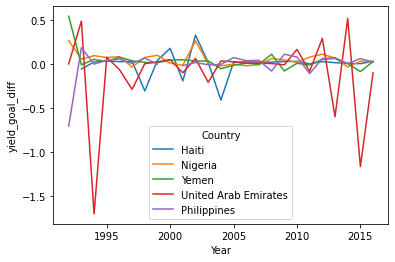

In [24]:
#The difference between yield and goal by country by years.  

df['yield_goal_diff'] = df['goal_percent_change'] - df['yield_percent_change']

sns.lineplot(data=df, x="Year", y='yield_goal_diff', hue="Country")

The UAE is actually meeting the goal yields more effectively than other countries.

<AxesSubplot:xlabel='Year', ylabel='cereals'>

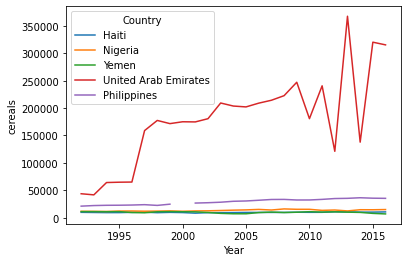

In [25]:
sns.lineplot(data=df, x="Year", y='cereals', hue="Country")

UAE produces most cereal crops.

<AxesSubplot:xlabel='Year', ylabel='cereals'>

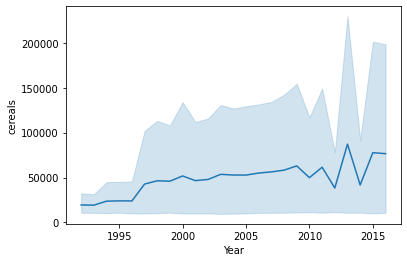

In [26]:
sns.lineplot(data=df, x="Year", y='cereals', )

# Projections

Temperatures expected to increase to 23.5 degrees F by 2050 under mitigated conditions

In [29]:
proj = df.copy()
proj.head()

,Unnamed: 0,Unnamed: 0.1,Country,Year,Depth of the food deficit (kilocalories per person per day),Population,Temperature - (Celsius),Temperature,cereals,potatoes,...,cassava,rapeseed,total_yield,Country_cat,yield_change,yield_percent_change,goal_percent_change,population_percent_change,temperature_percent_change,yield_goal_diff
0,0,0,Haiti,1992,519.0,7319493.0,25.148342,80.296683,9761.0,145455.0,...,40326.0,0.0,562480.0,0.0,NaN,NaN,0.024,NaN,NaN,NaN
1,1,1,Haiti,1993,525.0,7460689.0,25.032542,80.065083,9492.0,150000.0,...,40244.0,0.0,606680.0,0.0,44200.0,0.078581,0.024,0.019290,-0.002884,-0.054581
2,2,2,Haiti,1994,543.0,7602320.0,25.361467,80.722933,9239.0,146502.0,...,37500.0,0.0,606388.0,0.0,-292.0,-0.000481,0.024,0.018984,0.008216,0.024481
3,3,3,Haiti,1995,561.0,7744503.0,25.208525,80.417050,9258.0,143591.0,...,39546.0,0.0,599372.0,0.0,-7016.0,-0.011570,0.024,0.018703,-0.003789,0.035570
4,4,4,Haiti,1996,575.0,7887304.0,24.814733,79.629467,9740.0,140000.0,...,40000.0,0.0,596640.0,0.0,-2732.0,-0.004558,0.024,0.018439,-0.009794,0.028558


In [33]:
proj['Year'] = proj["Year"].astype("int")

proj['Year_proj'] = proj['Year'] + 34

#Add low projections in 
proj['low_project'] = proj['Temperature'] + 0.12

proj[proj['Year']== 2016]['Temperature']

24     81.003167
49     85.597317
74     78.442400
99     86.480267
123    82.946217
Name: Temperature, dtype: float64

In [40]:
projections = pd.read_csv('data/myprojections.csv')

projections.head()

,Year,Country,Temperature,low_projected,med-proj,high-proj
0,2016,Haiti,81.0,NaN,NaN,NaN
1,2021,Haiti,NaN,NaN,NaN,NaN
2,2022,Haiti,NaN,NaN,NaN,NaN
3,2023,Haiti,NaN,NaN,NaN,NaN
4,2024,Haiti,NaN,NaN,NaN,NaN


In [41]:
projections

,Year,Country,Temperature,low_projected,med-proj,high-proj
0,2016,Haiti,81.0,NaN,NaN,NaN
1,2021,Haiti,NaN,NaN,NaN,NaN
2,2022,Haiti,NaN,NaN,NaN,NaN
3,2023,Haiti,NaN,NaN,NaN,NaN
4,2024,Haiti,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
105,2046,Phillipines,NaN,NaN,NaN,NaN
106,2047,Phillipines,NaN,NaN,NaN,NaN
107,2048,Phillipines,NaN,NaN,NaN,NaN
108,2049,Phillipines,NaN,NaN,NaN,NaN


In [42]:
for i in range(len(projections) - 1):
    for value in projections['Year']:
        if value < 2050: 
            projections['Temperature'][i + 1] +=  0.12
        
    
    

<ipython-input-42-20ae2541a03c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  projections['Temperature'][i + 1] +=  0.12


In [43]:
projections.head()

,Year,Country,Temperature,low_projected,med-proj,high-proj
0,2016,Haiti,81.0,NaN,NaN,NaN
1,2021,Haiti,NaN,NaN,NaN,NaN
2,2022,Haiti,NaN,NaN,NaN,NaN
3,2023,Haiti,NaN,NaN,NaN,NaN
4,2024,Haiti,NaN,NaN,NaN,NaN


## EDA 

In [44]:
data = pd.read_csv('data/final_data.csv')

In [45]:
data.head()

,Unnamed: 0,index,Country,Code_x,Year,cereals,potatoes,beans,sugar,soybeans,palm-oil,cassava,rapeseed,total_yield,Average monthly precipitation,AverageTemperature,AverageTemperatureUncertainty,Surface temperature anomaly,Code,Population
0,0,0,Afghanistan,AFG,1961,11151.0,86667.0,0.0,250000.0,0.0,0.0,0.0,0.0,347818,2.283719,14.064917,0.398083,-0.05,AFG,9169000.0
1,1,1,Afghanistan,AFG,1962,10790.0,76667.0,0.0,250000.0,0.0,0.0,0.0,0.0,337457,1.875860,13.768667,0.406167,-0.33,AFG,9351000.0
2,2,2,Afghanistan,AFG,1963,9858.0,81333.0,0.0,250000.0,0.0,0.0,0.0,0.0,341191,2.139667,15.033417,0.401250,0.83,AFG,9543000.0
3,3,3,Afghanistan,AFG,1964,10828.0,86000.0,0.0,250000.0,0.0,0.0,0.0,0.0,346828,2.272978,13.084917,0.449417,-1.03,AFG,9745000.0
4,4,4,Afghanistan,AFG,1965,10989.0,88000.0,0.0,255000.0,0.0,0.0,0.0,0.0,353989,2.342783,14.101833,0.408083,0.04,AFG,9956000.0


Text(0.5, 1.0, 'Non-Adjusted Sale Price')

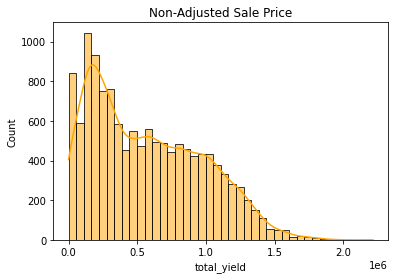

In [46]:
sns.histplot(data, x="total_yield", color = 'orange', kde = True)
plt.title('Non-Adjusted Sale Price')

In [47]:
data['log_yield'] = np.log10(data['total_yield'])


data.head()

/Users/mayamorales/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


,Unnamed: 0,index,Country,Code_x,Year,cereals,potatoes,beans,sugar,soybeans,...,cassava,rapeseed,total_yield,Average monthly precipitation,AverageTemperature,AverageTemperatureUncertainty,Surface temperature anomaly,Code,Population,log_yield
0,0,0,Afghanistan,AFG,1961,11151.0,86667.0,0.0,250000.0,0.0,...,0.0,0.0,347818,2.283719,14.064917,0.398083,-0.05,AFG,9169000.0,5.541352
1,1,1,Afghanistan,AFG,1962,10790.0,76667.0,0.0,250000.0,0.0,...,0.0,0.0,337457,1.875860,13.768667,0.406167,-0.33,AFG,9351000.0,5.528218
2,2,2,Afghanistan,AFG,1963,9858.0,81333.0,0.0,250000.0,0.0,...,0.0,0.0,341191,2.139667,15.033417,0.401250,0.83,AFG,9543000.0,5.532998
3,3,3,Afghanistan,AFG,1964,10828.0,86000.0,0.0,250000.0,0.0,...,0.0,0.0,346828,2.272978,13.084917,0.449417,-1.03,AFG,9745000.0,5.540114
4,4,4,Afghanistan,AFG,1965,10989.0,88000.0,0.0,255000.0,0.0,...,0.0,0.0,353989,2.342783,14.101833,0.408083,0.04,AFG,9956000.0,5.548990


In [48]:
data.dtypes

Unnamed: 0                         int64
index                              int64
Country                           object
Code_x                            object
Year                               int64
cereals                          float64
potatoes                         float64
beans                            float64
sugar                            float64
soybeans                         float64
palm-oil                         float64
cassava                          float64
rapeseed                         float64
total_yield                        int64
Average monthly precipitation    float64
AverageTemperature               float64
AverageTemperatureUncertainty    float64
Surface temperature anomaly      float64
Code                              object
Population                       float64
log_yield                        float64
dtype: object

## EDA on Hunger Predictions

In [49]:
#imports 

no_mit = pd.read_csv('data/mypredictions/no_mitigation_hunger_preds.csv')

mit = pd.read_csv('data/mypredictions/with_mitigation_hunger_preds.csv')

hunger_preds = pd.read_csv('data/mypredictions/hunger_preds.csv')

In [50]:
no_mit.rename(columns = {"yield_predicted": 'yield predicted w/o mitigation',
                        'hunger_predicted': 'hunger predicted w/o mitigation'}, inplace = True)

In [51]:
mit

,Unnamed: 0,yield_predicted,Country,Year,hunger_predicted
0,0,0.314324,Afghanistan,2000,22.9
1,1,0.314324,Afghanistan,2002,22.9
2,2,0.137896,Afghanistan,2012,5.7
3,3,0.002004,Afghanistan,2020,39.8
4,4,0.002004,Afghanistan,2030,36.2
...,...,...,...,...,...
1555,1555,0.114703,Zimbabwe,2066,42.8
1556,1556,0.114703,Zimbabwe,2076,42.8
1557,1557,0.114703,Zimbabwe,2086,42.8
1558,1558,0.114703,Zimbabwe,2096,42.8


In [52]:
mit.rename(columns = {"yield_predicted": 'yield predicted w/ mitigation',
                        'hunger_predicted': 'hunger predicted w/ mitigation'}, inplace = True)

In [53]:
preds = pd.merge(mit, no_mit, how = 'left', left_on=['Country', 'Year'], right_on = ['Country','Year'])

In [54]:
preds.drop(columns = ['Unnamed: 0_x','Unnamed: 0_y'], inplace = True)

In [55]:
preds[['Country','Year','hunger predicted w/ mitigation', 'hunger predicted w/o mitigation']]

,Country,Year,hunger predicted w/ mitigation,hunger predicted w/o mitigation
0,Afghanistan,2000,22.9,22.9
1,Afghanistan,2002,22.9,22.9
2,Afghanistan,2012,5.7,5.7
3,Afghanistan,2020,39.8,39.8
4,Afghanistan,2030,36.2,36.2
...,...,...,...,...
1627,Zimbabwe,2066,42.8,42.8
1628,Zimbabwe,2076,42.8,42.8
1629,Zimbabwe,2086,42.8,42.8
1630,Zimbabwe,2096,42.8,42.8


In [56]:
preds[preds['Country'] == 'Yemen' ]

,yield predicted w/ mitigation,Country,Year,hunger predicted w/ mitigation,yield predicted w/o mitigation,hunger predicted w/o mitigation
1590,0.086310,Yemen,2000,30.5,0.086310,30.5
1591,0.053155,Yemen,2002,30.6,0.053155,30.6
1592,0.088138,Yemen,2012,26.2,0.088138,26.2
1593,0.002004,Yemen,2020,39.8,0.001242,39.8
1594,0.002004,Yemen,2030,36.2,0.001242,36.2
1595,0.002147,Yemen,2040,28.6,0.001242,28.6
1596,0.002147,Yemen,2050,28.6,0.001242,28.6
1597,0.002147,Yemen,2056,28.6,0.001242,28.6
1598,0.002147,Yemen,2060,28.6,0.001242,28.6
1599,0.002147,Yemen,2066,28.6,0.001242,28.6


In [57]:
undernourished = pd.read_csv('data/Data2/prevalence-of-undernourishment.csv')

undernourished.head()

undernourished.rename(columns = {"Entity": 'Country',
                                'Suite of Food Security Indicators - Prevalence of undernourishment (percent) (3-year average) - 210041 - Value - 6121 - %': 'Undernourishment'}, inplace = True)

In [58]:
undernourished

,Country,Code,Year,Undernourishment
0,Afghanistan,AFG,2000,46.1
1,Afghanistan,AFG,2001,46.4
2,Afghanistan,AFG,2002,43.7
3,Afghanistan,AFG,2003,39.8
4,Afghanistan,AFG,2004,36.1
...,...,...,...,...
2809,Zimbabwe,ZWE,2013,44.1
2810,Zimbabwe,ZWE,2014,46.9
2811,Zimbabwe,ZWE,2015,49.5
2812,Zimbabwe,ZWE,2016,50.9


In [59]:
df = pd.read_csv('data/thisisdf.csv')

df.head()

,Unnamed: 0,Unnamed: 0.1,index,Country,Code_x,Year,cereals,potatoes,beans,sugar,...,Population,yield_change,yield_percent_change,goal_percent_change,yield_goal_diff,country_cat,temp_anomalies,temp_pct_change,precip_change,precip_temp
0,0,0,0,Afghanistan,AFG,1961,11151.0,86667.0,0.0,250000.0,...,9169000.0,0.0,0.000000,0.024,0.000000,0,14.014917,0.000000,0.000000,32.120313
1,1,1,1,Afghanistan,AFG,1962,10790.0,76667.0,0.0,250000.0,...,9351000.0,-10361.0,-0.029789,0.024,0.053789,0,13.438667,-0.041117,-0.178594,25.828087
2,2,2,2,Afghanistan,AFG,1963,9858.0,81333.0,0.0,250000.0,...,9543000.0,3734.0,0.011065,0.024,0.012935,0,15.863417,0.180431,0.140633,32.166510
3,3,3,3,Afghanistan,AFG,1964,10828.0,86000.0,0.0,250000.0,...,9745000.0,5637.0,0.016522,0.024,0.007478,0,12.054917,-0.240081,0.062304,29.741723
4,4,4,4,Afghanistan,AFG,1965,10989.0,88000.0,0.0,255000.0,...,9956000.0,7161.0,0.020647,0.024,0.003353,0,14.141833,0.173117,0.030711,33.037539


In [60]:
df_hunger = pd.merge(df, undernourished, how = 'left', right_on = ['Year', 'Country'], left_on = ['Year', 'Country'] )

In [61]:
df_hunger

,Unnamed: 0,Unnamed: 0.1,index,Country,Code_x,Year,cereals,potatoes,beans,sugar,...,yield_percent_change,goal_percent_change,yield_goal_diff,country_cat,temp_anomalies,temp_pct_change,precip_change,precip_temp,Code_y,Undernourishment
0,0,0,0,Afghanistan,AFG,1961,11151.0,86667.0,0.0,250000.0,...,0.000000,0.024,0.000000,0,14.014917,0.000000,0.000000,32.120313,NaN,NaN
1,1,1,1,Afghanistan,AFG,1962,10790.0,76667.0,0.0,250000.0,...,-0.029789,0.024,0.053789,0,13.438667,-0.041117,-0.178594,25.828087,NaN,NaN
2,2,2,2,Afghanistan,AFG,1963,9858.0,81333.0,0.0,250000.0,...,0.011065,0.024,0.012935,0,15.863417,0.180431,0.140633,32.166510,NaN,NaN
3,3,3,3,Afghanistan,AFG,1964,10828.0,86000.0,0.0,250000.0,...,0.016522,0.024,0.007478,0,12.054917,-0.240081,0.062304,29.741723,NaN,NaN
4,4,4,4,Afghanistan,AFG,1965,10989.0,88000.0,0.0,255000.0,...,0.020647,0.024,0.003353,0,14.141833,0.173117,0.030711,33.037539,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7703,12797,12797,12532,Equatorial Guinea,GNQ,2012,0.0,0.0,0.0,0.0,...,0.018631,0.024,0.005369,44,26.146833,0.006590,0.050813,434.513945,NaN,NaN
7704,12798,12798,12533,Equatorial Guinea,GNQ,2013,0.0,0.0,0.0,0.0,...,0.006570,0.024,0.017430,44,26.170500,0.000905,0.052970,458.491726,NaN,NaN
7705,12804,12804,12539,Solomon Islands,SLB,1987,0.0,0.0,0.0,0.0,...,1.010001,0.024,-0.986001,127,26.775417,0.023114,0.194321,576.792824,NaN,NaN
7706,12805,12805,12540,Solomon Islands,SLB,1988,0.0,0.0,0.0,0.0,...,0.171094,0.024,-0.147094,127,27.579583,0.030034,0.364994,796.787023,NaN,NaN


In [62]:
df_hunger.isnull().sum()

Unnamed: 0                          0
Unnamed: 0.1                        0
index                               0
Country                             0
Code_x                              0
Year                                0
cereals                             0
potatoes                            0
beans                               0
sugar                               0
soybeans                            0
palm-oil                            0
cassava                             0
rapeseed                            0
total_yield                         0
Average monthly precipitation       0
AverageTemperature                  0
AverageTemperatureUncertainty       0
Surface temperature anomaly         0
Code_x                              0
Population                          0
yield_change                        0
yield_percent_change                0
goal_percent_change                 0
yield_goal_diff                     0
country_cat                         0
temp_anomali

In [63]:
hunger = df_hunger.dropna()

In [64]:
hunger

,Unnamed: 0,Unnamed: 0.1,index,Country,Code_x,Year,cereals,potatoes,beans,sugar,...,yield_percent_change,goal_percent_change,yield_goal_diff,country_cat,temp_anomalies,temp_pct_change,precip_change,precip_temp,Code_y,Undernourishment
39,39,39,39,Afghanistan,AFG,2000,8063.0,167857.0,0.0,190000.0,...,-0.012932,0.024,0.036932,0,16.917833,0.021685,-0.175624,24.650437,AFG,46.1
40,40,40,40,Afghanistan,AFG,2001,10067.0,167857.0,0.0,190000.0,...,0.005477,0.024,0.018523,0,17.448083,0.031343,-0.049079,23.864507,AFG,46.4
41,41,41,41,Afghanistan,AFG,2002,16698.0,164286.0,0.0,190000.0,...,0.008317,0.024,0.015683,0,17.317667,-0.007475,0.413284,33.213400,AFG,43.7
42,42,42,42,Afghanistan,AFG,2003,14580.0,166667.0,0.0,181818.0,...,-0.021346,0.024,0.045346,0,15.996000,-0.076319,0.064549,33.942645,AFG,39.8
43,43,43,43,Afghanistan,AFG,2004,13348.0,176471.0,0.0,200000.0,...,0.073689,0.024,-0.049689,0,17.530917,0.095956,-0.181178,29.385955,AFG,36.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7647,12648,12648,12383,Samoa,WSM,2009,0.0,0.0,0.0,120000.0,...,0.003486,0.024,0.020514,120,27.188333,0.009174,-0.020687,592.589430,WSM,3.5
7648,12649,12649,12384,Samoa,WSM,2010,0.0,0.0,0.0,120000.0,...,0.043973,0.024,-0.019973,120,27.801667,0.022559,0.234317,743.301642,WSM,3.4
7649,12650,12650,12385,Samoa,WSM,2011,0.0,0.0,0.0,120000.0,...,-0.045580,0.024,0.069580,120,26.925583,-0.031512,-0.114863,647.118213,WSM,3.3
7650,12651,12651,12386,Samoa,WSM,2012,0.0,0.0,0.0,120000.0,...,-0.031943,0.024,0.055943,120,27.286667,0.013410,-0.140228,560.770297,WSM,3.1


In [65]:
import plotly.express as px
import plotly.graph_objects as go

## Scaling hunger variables 

In [69]:
hunger['yields_scaled'] = np.log10(hunger['total_yield'])

hunger['Undernoushment_Scaled'] = np.log10(hunger['Undernourishment'])

<ipython-input-69-3fde5b707c21>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [73]:
#Finding countries wiht most hunger 

top_hunger = hunger[np.isin(hunger, ['Afghanistan', 'Angola', 'Central African Republic', 'Chad', 'Congo', 'Djibouti', 'Ethiopia', 'Haiti', 'Liberia', 'Mozambique', 'North Korea', 'Rwanda', 'Sierra Leone', 'Zambia', 'Zimbabwe']).any(axis =1)]
                            
                            

In [74]:
top_hunger

,Unnamed: 0,Unnamed: 0.1,index,Country,Code_x,Year,cereals,potatoes,beans,sugar,...,yield_goal_diff,country_cat,temp_anomalies,temp_pct_change,precip_change,precip_temp,Code_y,Undernourishment,yields_scaled,Undernoushment_Scaled
39,39,39,39,Afghanistan,AFG,2000,8063.0,167857.0,0.0,190000.0,...,0.036932,0,16.917833,0.021685,-0.175624,24.650437,AFG,46.1,5.563386,1.663701
40,40,40,40,Afghanistan,AFG,2001,10067.0,167857.0,0.0,190000.0,...,0.018523,0,17.448083,0.031343,-0.049079,23.864507,AFG,46.4,5.565758,1.666518
41,41,41,41,Afghanistan,AFG,2002,16698.0,164286.0,0.0,190000.0,...,0.015683,0,17.317667,-0.007475,0.413284,33.213400,AFG,43.7,5.569355,1.640481
42,42,42,42,Afghanistan,AFG,2003,14580.0,166667.0,0.0,181818.0,...,0.045346,0,15.996000,-0.076319,0.064549,33.942645,AFG,39.8,5.559984,1.599883
43,43,43,43,Afghanistan,AFG,2004,13348.0,176471.0,0.0,200000.0,...,-0.049689,0,17.530917,0.095956,-0.181178,29.385955,AFG,36.1,5.590863,1.557507
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7539,12044,12044,11779,Zimbabwe,ZWE,2009,4524.0,166349.0,4784.0,646403.0,...,0.110416,158,22.247250,-0.002168,-0.073123,109.739321,ZWE,42.8,5.945340,1.631444
7540,12045,12045,11780,Zimbabwe,ZWE,2010,7337.0,166967.0,3946.0,662027.0,...,0.004462,158,23.516250,0.057041,-0.006063,112.181313,ZWE,41.9,5.953743,1.622214
7541,12046,12046,11781,Zimbabwe,ZWE,2011,5877.0,167407.0,2980.0,714019.0,...,-0.030449,158,22.822417,-0.029504,0.097946,121.018738,ZWE,41.3,5.976769,1.615950
7542,12047,12047,11782,Zimbabwe,ZWE,2012,6964.0,171875.0,4016.0,734595.0,...,-0.009596,158,22.441333,-0.016698,-0.293709,85.153672,ZWE,42.0,5.991120,1.623249


In [75]:
#Looking at hunger and yields scaled 
fig = px.line(top_hunger, x= "Year", y = ["Undernourishment", 'yields_scaled'], color='Country')

fig.show()

In [77]:
#Looking at the yield by country 

import plotly.graph_objects as go

fig = go.Figure(data=[go.Scatter(
    x= top_hunger.sort_values('total_yield')['Country'].unique(),
    y= top_hunger['total_yield'],
    mode='markers',
    marker=dict(
        color = [120,121,123, 124, 125,127,128,129, 130,132, 135, 140,141,142, 143, 145],
        size=[15,20,25,30,35, 40, 45, 55, 60, 65, 70,80, 75, 90, 110],
        showscale=True
        )
)])

fig.show()

In [78]:
#looking at % of population undernourished by country 

import plotly.graph_objects as go

fig = go.Figure(data=[go.Scatter(
    x= top_hunger.sort_values('Undernourishment', ascending = False)['Country'].unique(),
    y= top_hunger['Undernourishment'],
    mode='markers',
    marker=dict(
        color = [120,121,123, 124, 125,127,128,129, 130,132, 135, 140,141,142, 143, 145],
        size=[15,20,25,30,35, 40, 45, 55, 60, 65, 70,80, 75, 90, 110],
        showscale=True
        )
)])

fig.show()

In [317]:
#Looking at countries rates of hunger in 2013

hunger_2013 = hunger[hunger['Year'] == 2013]

#df = px.data.gapminder().query("year == 2013")
fig = px.sunburst(hunger_2013, path=['Country'], values='Undernourishment',
                  color='Undernourishment', hover_data=['total_yield'],
                  color_continuous_scale='RdBu',
                  color_continuous_midpoint=np.average(hunger_2013['Undernourishment'], weights=hunger_2013['total_yield']))
fig.show()

#### Examining correlations between hunger and other variables 

In [348]:
good = hunger[['Undernourishment', 'AverageTemperature', 'Year','total_yield','temp_pct_change',
               'precip_change', 'Country', 'temp_anomalies', 'precip_change', 'Average monthly precipitation',
               'AverageTemperatureUncertainty', 'yield_goal_diff', 'precip_temp', 'yield_percent_change',
              'yield_goal_diff']]



corr_matrix = good.corr()
corr = corr_matrix.Undernourishment.sort_values(ascending = False)

In [349]:
corr

Undernourishment                 1.000000
AverageTemperatureUncertainty    0.334870
AverageTemperature               0.187372
temp_anomalies                   0.186212
total_yield                      0.035149
yield_percent_change             0.019545
temp_pct_change                  0.018200
precip_temp                      0.006360
yield_goal_diff                 -0.019545
yield_goal_diff                 -0.019545
Average monthly precipitation   -0.022809
precip_change                   -0.025870
precip_change                   -0.025870
Year                            -0.134453
Name: Undernourishment, dtype: float64

/Users/mayamorales/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



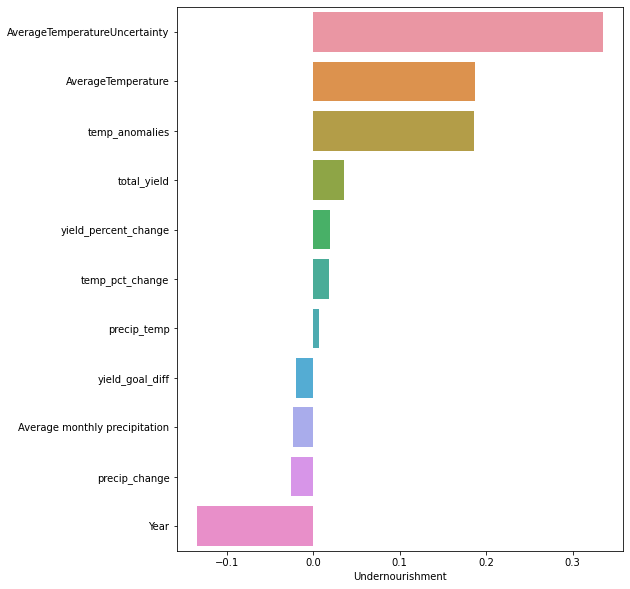

In [350]:
#Plotting correaltions

plt.figure(figsize=(8,10))
sns.barplot(corr[1:], corr.index[1:], orient='h')
plt.show()

In [79]:
import plotly.express as px

#fig.title("There is no Correlation between Yield and Hunger alone")
fig = px.scatter(top_hunger.query("Year==2013"), x="Undernourishment", y="total_yield",
	         size="total_yield", color="Country",
                 hover_name="Country", log_x=True, size_max=60, title = "No Strong Correlation between Yield and Hunger alone")
fig.show()

In [362]:
#Calculating hunger in number of people

hunger['number of people'] = hunger['Population'] * (hunger['Undernourishment'] / 100) 

people_hungry = hunger.groupby('Year').sum()

people_hungry.reset_index(inplace = True)

In [363]:
fig = px.line(people_hungry, x="Year", y="number of people")
fig.show()

The total number of hungry people has declined significantly over the years

In [364]:
#Another hunger graph, shoes hunger decreasing

df = px.data.iris()
fig = px.scatter(people_hungry, x="Year", y="number of people", color="total_yield",
                 size='number of people', hover_data=['number of people'])
fig.show()

### Plotting predictions made in modeling notebook 

In [81]:
yield_acc = pd.read_csv('data/yield_predictions_acc.csv')

In [98]:
yield_acc

,Unnamed: 0,Country,Year,yield_predicted,yield_actual
0,0,Switzerland,2008,515795.0,551114
1,1,Turkmenistan,1997,92116.0,118998
2,2,United States,1980,1200620.0,1191875
3,3,Gambia,1996,142689.0,140014
4,4,Madagascar,1991,612511.0,579082
...,...,...,...,...,...
2308,2308,Jordan,1990,189057.0,329002
2309,2309,Niger,1971,566800.0,439701
2310,2310,Albania,1998,110995.0,181108
2311,2311,Japan,1963,987548.0,776567


In [125]:
random_x = np.linspace(0, 1, 2313)

fig = go.Figure(data = go.Scatter(x = yield_acc['yield_actual'], y=yield_acc['yield_predicted'],mode = 'markers', 
                                  marker_color=yield_acc['yield_actual']))

fig.update_layout(title='Yield Predicted Vs. Yield Actual',
                 xaxis_title="Yield Actual",
                yaxis_title="Yield Predicted",)
fig.show()

## Looking at how yields differ across predicted and historical data 

In [261]:
yr_2000 = yield_acc[yield_acc['Year'] == 2000][['Country', 'yield_predicted']]

yr_2000['Year'] = 2000

yr_2000.rename(columns = {'yield_predicted': 'goal_yield'}, inplace = True)


yr_2050 = yr_2000.copy()
yr_2050['Year'] = 2050
yr_2050['goal_yield'] = yr_2000['goal_yield'] * 2

yr_2050.head()

In [262]:
yr_2050.head()

,Country,goal_yield,Year
26,Madagascar,1225022.0,2050
43,United States,2401240.0,2050
60,Slovakia,471566.0,2050
128,Malaysia,1676102.0,2050
129,Argentina,1723318.0,2050


In [263]:
yrs = pd.concat([yr_2050, yr_2000])

In [265]:
yrs['Country'] = yrs['Country'].astype('category')

## Importing no mitigation data

In [266]:
no_mit = pd.read_csv('data/no_mitigation_for_preds.csv')

In [267]:
no_mit['Country'] = no_mit['Country'].astype('category')

In [269]:
year_dex = no_mit[['Year', 'Country']]

year_dex

,Year,Country
0,2000,Afghanistan
1,2001,Afghanistan
2,2002,Afghanistan
3,2004,Afghanistan
4,2006,Afghanistan
...,...,...
8313,2094,Zimbabwe
8314,2096,Zimbabwe
8315,2098,Zimbabwe
8316,2099,Zimbabwe


### Preparing data to  merge Dataframes

In [271]:
yrs.sort_values(['Country', 'Year'], inplace = True)

yrs.reset_index(drop = True)

,Country,goal_yield,Year
0,Angola,655286.0,2000
1,Angola,1310572.0,2050
2,Argentina,861659.0,2000
3,Argentina,1723318.0,2050
4,Azerbaijan,138959.0,2000
...,...,...,...
99,Uruguay,913998.0,2050
100,Uzbekistan,202117.0,2000
101,Uzbekistan,404234.0,2050
102,Zimbabwe,1247940.0,2000


In [274]:
yrs['Year'] = yrs['Year'].astype('int')

year_dex['Year'] = year_dex['Year'].astype('int')

yrs['Country'] = yrs['Country'].astype('object')

year_dex['Country'] = year_dex['Country'].astype('object')

<ipython-input-274-7e23be127529>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [276]:
#merge

goals = pd.merge(year_dex, yrs, how = 'left', left_on =['Year', 'Country'], right_on = ['Year', 'Country'])

In [277]:
goaled = pd.concat([yrs, year_dex])

In [279]:
goaled.sort_values(['Country', 'Year'], inplace = True)

In [281]:
goaled['goal_yield'].interpolate(inplace = True)

In [282]:
goaled.dropna(inplace = True)

In [283]:
goaled

,Country,goal_yield,Year
1185,Angola,6.552860e+05,2000
157,Angola,6.804893e+05,2000
158,Angola,7.056926e+05,2002
159,Angola,7.308959e+05,2004
160,Angola,7.560992e+05,2006
...,...,...,...
8313,Zimbabwe,2.495880e+06,2094
8314,Zimbabwe,2.495880e+06,2096
8315,Zimbabwe,2.495880e+06,2098
8316,Zimbabwe,2.495880e+06,2099


In [285]:
actual = yield_acc[['Country', 'Year','yield_actual']]

In [287]:
goal_actual = pd.concat([actual, goaled])

In [288]:
goal_actual

,Country,Year,yield_actual,goal_yield
0,Switzerland,2008,551114.0,NaN
1,Turkmenistan,1997,118998.0,NaN
2,United States,1980,1191875.0,NaN
3,Gambia,1996,140014.0,NaN
4,Madagascar,1991,579082.0,NaN
...,...,...,...,...
8313,Zimbabwe,2094,NaN,2495880.0
8314,Zimbabwe,2096,NaN,2495880.0
8315,Zimbabwe,2098,NaN,2495880.0
8316,Zimbabwe,2099,NaN,2495880.0


In [294]:
goal_actual_grouped = goal_actual.groupby('Year').mean()

goal_actual_grouped.reset_index(inplace = True)

In [304]:
goal_country = goal_actual.groupby('Country').mean()

goal_country.reset_index(inplace = True)

In [299]:
fig = px.line(goal_actual_grouped, x="Year", y=['yield_actual', 'goal_yield'])
fig.show()

Though the lines are disconnected there is a clear discrepency between actual yield and goal yield.

In [308]:
fig = px.line(goal_country, x='Country', y=['yield_actual', 'goal_yield'], title = "Actual yield VS. Goal Yield by Country")


fig.show()

The difference between goal yield and actual yield by country, as you can see most ocuntries do not meet goal yield.